In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For plotting slides about Trump's National Emergency Video

In [2]:
with open('CNN.txt','r') as f:
    CNN = f.readlines()
    for i in range(len(CNN)):
        CNN[i] = CNN[i].rstrip('\n')
CNN_values = CNN[4].split(' ')
print(CNN_values)

['Wall', '304.39639153869996', '-195.69704915898282']


In [3]:
with open('ABC.txt','r') as f:
    ABC = f.readlines()
    for i in range(len(ABC)):
        ABC[i] = ABC[i].rstrip('\n')
ABC_values = ABC[4].split(' ')
print(ABC_values)

['Wall', '80.49849867792575', '-54.81673513407888']


In [4]:
with open('BBC.txt','r') as f:
    BBC = f.readlines()
    for i in range(len(BBC)):
        BBC[i] = BBC[i].rstrip('\n')
BBC_values = BBC[4].split(' ')
print(BBC_values)

['Wall', '126.4836356120731', '-78.50205644884221']


In [5]:
with open('CBS.txt','r') as f:
    CBS = f.readlines()
    for i in range(len(CBS)):
        CBS[i] = CBS[i].rstrip('\n')
CBS_values = CBS[4].split(' ')
print(CBS_values)

['Wall', '95.3029073400052', '-64.9684786427197']


In [6]:
with open('Fox.txt','r') as f:
    FOX = f.readlines()
    for i in range(len(FOX)):
        FOX[i] = FOX[i].rstrip('\n')
FOX_values = FOX[4].split(' ')
print(FOX_values)

['Wall', '191.7894742439274', '-101.82282562710911']


In [7]:
with open('MSNBC.txt','r') as f:
    MSNBC = f.readlines()
    for i in range(len(MSNBC)):
        MSNBC[i] = MSNBC[i].rstrip('\n')
MSNBC_values = MSNBC[4].split(' ')
print(MSNBC_values)

['Wall', '75.71919666813227', '-52.24682042494542']


In [8]:
sum_abc = float(ABC_values[1]) + abs(float(ABC_values[2]))
sum_bbc = float(BBC_values[1]) + abs(float(BBC_values[2]))
sum_cbs = float(CBS_values[1]) + abs(float(CBS_values[2]))
sum_cnn = float(CNN_values[1]) + abs(float(CNN_values[2]))
sum_fox = float(FOX_values[1]) + abs(float(FOX_values[2]))
sum_msnbc = float(MSNBC_values[1]) + abs(float(MSNBC_values[2]))

Text(0,0.5,'News Channel')

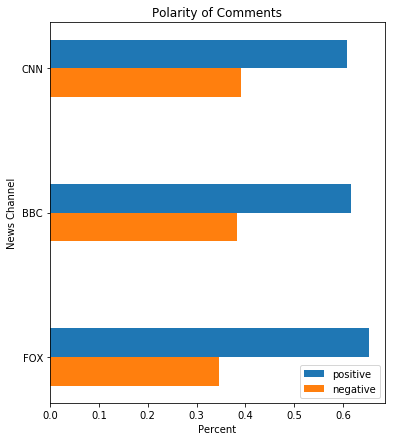

In [9]:
#normalized trump plot, this plot totals the polarity for all comments in the video
fig,ax = plt.subplots(figsize=(6,7))
names = ['FOX','BBC','CNN']
positive_score = [float(FOX_values[1])/sum_fox,
                  float(BBC_values[1])/sum_bbc,
                  float(CNN_values[1])/sum_cnn]

negative_score = [abs(float(FOX_values[2]))/sum_fox,
                  abs(float(BBC_values[2]))/sum_bbc,
                  abs(float(CNN_values[2]))/sum_cnn,]

ax.barh(names,positive_score,height=0.2,align='edge')
ax.barh(names,negative_score,height=-0.2,align='edge')
ax.set_title('Polarity of Comments')
ax.legend(('positive','negative'),loc='best')
ax.set_xlabel('Percent')
ax.set_ylabel('News Channel')

Text(0,0.5,'News Channel')

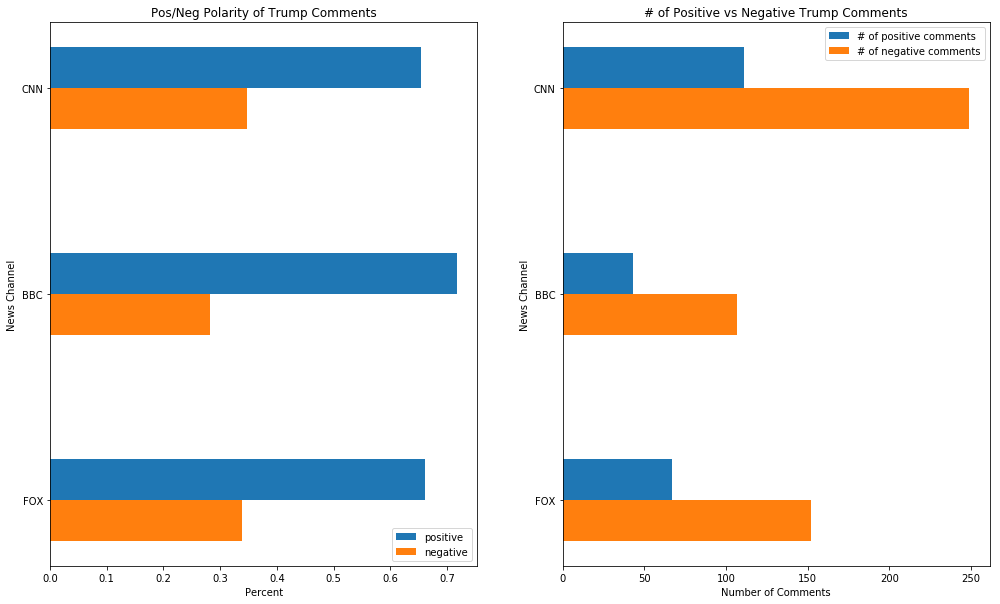

In [10]:
#create normalized plot, this plot totals the polarity of only comments mentioning 'Trump'
fig,ax = plt.subplots(1,2,figsize = (6,10))
plt.subplots_adjust(right=2.3)

#organized from least to most subscribers
names = ['FOX','BBC','CNN']

#values taken from D:\ECE-143-Project---Group-11\sentiment_analysis\textblob_data\news
positive_score = [27.185175414862904,20.325324675324683,39.84338798450779]
negative_score = [13.885322833994708,8.012678571428571,21.13975319271372]

#normalize the scores
summed_score=[sum(x) for x in zip(positive_score,negative_score)]
normalized_pos=[x[0]/x[1] for x in zip(positive_score,summed_score)]
normalized_neg=[x[0]/x[1] for x in zip(negative_score,summed_score)]

ax[0].barh(names,normalized_pos,height=0.2,align='edge')
ax[0].barh(names,normalized_neg,height=-0.2,align='edge')
ax[0].set_title('Pos/Neg Polarity of Trump Comments')
ax[0].legend(('positive','negative'),loc='best')
ax[0].set_xlabel('Percent')
ax[0].set_ylabel('News Channel')

#plot number of positive trump comments and negative trump comments
pos_trump = [67,43,111]
neg_trump = [152,107,249]

ax[1].barh(names,pos_trump,height=0.2,align='edge')
ax[1].barh(names,neg_trump,height=-0.2,align='edge')
ax[1].set_title('# of Positive vs Negative Trump Comments')
ax[1].legend(('# of positive comments','# of negative comments'),loc='best')
ax[1].set_xlabel('Number of Comments')
ax[1].set_ylabel('News Channel')

## Add up all the positive polarity for each channel and compare with negative polarity

In [11]:
def sum_polarities(file):
    '''
    This function takes in a file which has the total positive and negative polarity of comments for each individual video topic.
    It sums up all the positive polarities and negative polarities to get a grand total polarity over all the video topics.
    It then normalizes the result.
    Args:
        file: (txt) .txt file containing the polarities of each video topic
    Returns:
        pos_sum: (float) takes the positive polarity of each video and sums it up
        neg_sum: (float) takes the negative polarity of each video and sums it up
        pos_norm: (float) sums up pos_sum and neg_sum and divides pos_sum by total
        neg_norm: (float) same as pos_norm except divides neg_sum by total
    '''
    assert isinstance(file,str)
    pos_sum = 0
    neg_sum = 0
    with open(file,'r') as f:
        a = f.readlines()
        for i in range(len(a)): #loop through each video topic
            data = a[i].split(' ')
            pos_sum += float(data[-2]) #sum up the positive polarities
            neg_sum += abs(float(data[-1])) #sum up the negative polarities
        #get the normalized pos/neg value
        total = pos_sum + neg_sum
        pos_norm = pos_sum/total
        neg_norm = neg_sum/total
        
    return pos_sum,neg_sum,pos_norm,neg_norm

In [12]:
abc_pos_sum, abc_neg_sum, abc_pos_norm, abc_neg_norm = sum_polarities('ABC2.txt')
bbc_pos_sum, bbc_neg_sum, bbc_pos_norm, bbc_neg_norm = sum_polarities('BBC2.txt')
cbs_pos_sum, cbs_neg_sum, cbs_pos_norm, cbs_neg_norm = sum_polarities('CBS2.txt')
cnn_pos_sum, cnn_neg_sum, cnn_pos_norm, cnn_neg_norm = sum_polarities('CNN2.txt')
fox_pos_sum, fox_neg_sum, fox_pos_norm, fox_neg_norm = sum_polarities('FOX2.txt')
msnbc_pos_sum, msnbc_neg_sum, msnbc_pos_norm, msnbc_neg_norm = sum_polarities('MSNBC2.txt')

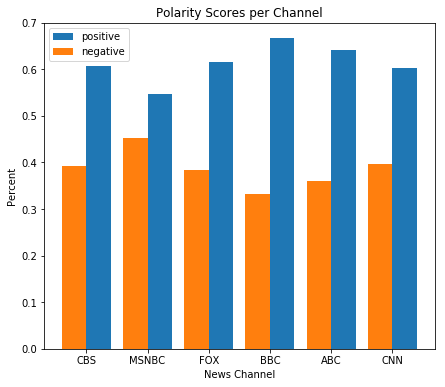

In [13]:
#plot each news channel normalized
fig,ax = plt.subplots(figsize=(7,6))

#organized from least to highest subscribers
channel_names = ['CBS','MSNBC','FOX','BBC','ABC','CNN']

channel_pos_values = [cbs_pos_norm,msnbc_pos_norm,fox_pos_norm,bbc_pos_norm,abc_pos_norm,cnn_pos_norm]
channel_neg_values = [cbs_neg_norm,msnbc_neg_norm,fox_neg_norm,bbc_neg_norm,abc_neg_norm,cnn_neg_norm]

ax.bar(channel_names,channel_pos_values,width=0.4,align='edge') #plot the positive values
ax.bar(channel_names,channel_neg_values,width=-0.4,align='edge') #plot the negative values
ax.set_title('Polarity Scores per Channel')
ax.set_xticklabels(channel_names,rotation=0)
ax.set_ylabel('Percent')
ax.set_xlabel('News Channel')
ax.legend(('positive','negative'),loc='best')

# Plot general graphs for synagogue shooting

In [14]:
def pos_neg_sent(file):
    '''
    This function takes in a file, which contains the video topic and the corresponding total positive and negative polarities.
    Stores each individual video topic polarity into a list.
    Args:
        file: (str) file containing each individual video topic per channel and the corresponding positive/negative polarities.
    Returns:
        pos: (list) list of floats with (# of index) = (# of video topics inside file) 
             containing the positive polarity for each video topic
        neg: (list) list of floats with (# of index) = (# of video topics inside file) 
             containing the negative polarity for each video topic
        normalized_pos: (list) normalized positive polarities per video topic taken by dividing val1 by val1+val2
        normalized_neg: (list) normalized negative polarities per video topic taken by dividing val2 by val1+val2
    '''
    assert isinstance(file,str)
    pos = [] #contains the positive polarities of each video topic in the file
    neg = [] #contains the negative polarities of each video topic in the file
    normalized_pos = [] #normalized positive score
    normalized_neg = [] #normalized negative score
    with open(file,'r') as f:
        a = f.readlines()
        for i in range(len(a)): #loop through each video topic
            data = a[i].split(' ')
            if len(data) == 4: #some video topics have their name split into two words
                #get the positive and negative polarities for each video category
                val1 = float(data[2]) #positive polarity 
                val2 = abs(float(data[3])) #negative polarity
                pos.append(val1) 
                neg.append(val2)
                total = val1 + val2
                #get the normalized values per video topic
                if total == 0:
                    total = 1
                normalized_pos.append(val1/total)
                normalized_neg.append(val2/total)
            else:
                val1 = float(data[1])
                val2 = abs(float(data[2]))
                pos.append(val1)
                neg.append(val2)
                total = val1 + val2
                if total == 0:
                    total = 1
                normalized_pos.append(val1/total)
                normalized_neg.append(val2/total)
            
    return pos,neg,normalized_pos,normalized_neg

In [15]:
foxpos,foxneg,fox_pos_norm,fox_neg_norm = pos_neg_sent('general_fox.txt')

In [16]:
cnnpos,cnnneg,cnn_pos_norm,cnn_neg_norm = pos_neg_sent('general_cnn.txt')

In [17]:
bbcpos,bbcneg,bbc_pos_norm,bbc_neg_norm = pos_neg_sent('general_bbc.txt')

Text(0,0.5,'Percent')

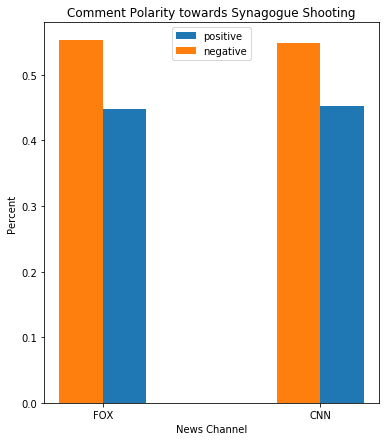

In [18]:
#normalized synagogue shooting plot, located as cbspos[1]
fig,ax = plt.subplots(figsize=(6,7))
names = ['FOX','CNN']
positive_score = [fox_pos_norm[1],cnn_pos_norm[1]]
negative_score = [fox_neg_norm[1],cnn_neg_norm[1]]

#positive_score = [cbspos[1],foxpos[1],cnnpos[1]]
#negative_score = [cbsneg[1],foxneg[1],cnnneg[1]]

ax.bar(names,positive_score,width=0.2,align='edge')
ax.bar(names,negative_score,width=-0.2,align='edge')
ax.set_title('Comment Polarity towards Synagogue Shooting')
ax.legend(('positive','negative'),loc='upper center')
ax.set_xlabel('News Channel')
ax.set_ylabel('Percent')

# Make wordcloud for pos/neg comments

In [60]:
def get_sentiment_trump(file):
    '''
    This function returns the positive, negative, and neutral strings containing 'trump' from file.
    The strings are determined as positive or negative by passing it through textblob
    Args:
        file: (str) file containing all the comments for one video topic of one channel
    Returns:
        pos_str: (str) one big string that combines all the comments that were deemed positive by textblob
        neg_str: (str) one big string that combines all the comments that were deemed negative by textblob
        neutral_str: (str) one big string that combines all the comments that were given a polarity of 0 by texblob
    '''
    assert isinstance(file,str)
    from textblob import TextBlob
    pos_str = ''
    neg_str = ''
    neutral_str = ''
    with open(file,'r',encoding='utf8') as f:
        for text in f:
            blob = TextBlob(text)
            for sentence in blob.sentences:
                sent = sentence.sentiment.polarity
                a = sentence.lower()
                if sent > 0:
                    if 'trump' in a:
                        pos_str = pos_str + ' ' + str(a)
                elif sent == 0:
                    if 'trump' in a:
                        neutral_str = neutral_str + ' ' + str(a)
                else:
                    if 'trump' in a:
                        neg_str = neg_str + ' ' + str(a)
        return (pos_str,neg_str,neutral_str)

In [4]:
def get_sentiment(file):
    '''
    This function returns the positive, negative, and neutral strings from file.
    Unlike get_sentiment_trump, this function does not only look for sentences containing 'trump'
    The strings are determined as positive or negative by passing it through textblob
    Args:
        file: (str) file containing all the comments for one video topic of one channel
    Returns:
        pos_str: (str) one big string that combines all the comments that were deemed positive by textblob
        neg_str: (str) one big string that combines all the comments that were deemed negative by textblob
        neutral_str: (str) one big string that combines all the comments that were given a polarity of 0 by texblob
    '''
    assert isinstance(file,str)
    from textblob import TextBlob
    pos_str = ''
    neg_str = ''
    neutral_str = ''
    with open(file,'r',encoding='utf8') as f:
        for text in f:
            blob = TextBlob(text)
            for sentence in blob.sentences:
                sent = sentence.sentiment.polarity
                a = sentence.lower()
                if sent > 0:
                    pos_str = pos_str + ' ' + str(a)
                elif sent == 0:
                    neutral_str = neutral_str + ' ' + str(a)
                else:
                    neg_str = neg_str + ' ' + str(a)
        return (pos_str,neg_str,neutral_str)

In [112]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
def posneg_wordcloud(sent):
    '''
    This function takes in a sentence and creates a wordcloud from that sentence.
    Args:
        sent: (str) sentence you want to make a wordcloud of
    Returns:
        wordcloud of sent
    '''
    assert isinstance(sent,str)
    s = list(set(STOPWORDS)) + ['donald','president','go','will','mr','wall','people','say','know','want','trump','california']
    wc = WordCloud(width = 1400, height = 800,
                    background_color ='white',
                    stopwords=s,
                    collocations = False,
                    min_font_size = 10).generate(sent) 
    plt.imshow(wc)
    plt.axis('off')

### CNN Wordclouds

In [67]:
cnn_wall = get_sentiment_trump('D:\\ECE-143-Project---Group-11\\data\\news\\CNN\\Wall')

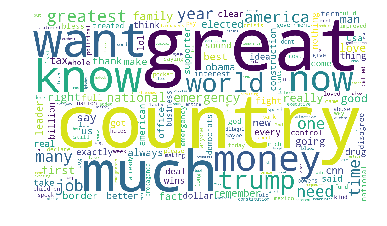

In [54]:
posneg_wordcloud(cnn_wall[0]) #included people,wall,say in stopword

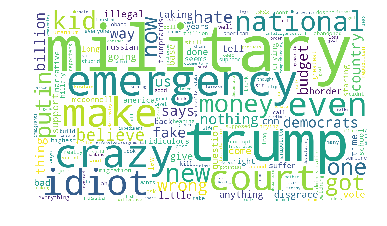

In [81]:
posneg_wordcloud(cnn_wall[1]) #included wall,know,military,want in stopword

In [63]:
cnn_synagogue = get_sentiment('D:\\ECE-143-Project---Group-11\\data\\news\\CNN\\Synagogue shooting')

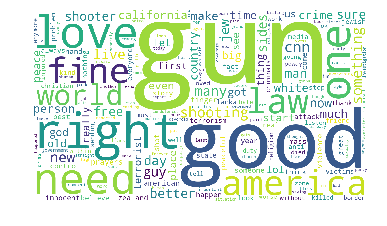

In [90]:
posneg_wordcloud(cnn_synagogue[0]) #included 'trump' in stopwords b/c comments using 'trump' were sarcastic

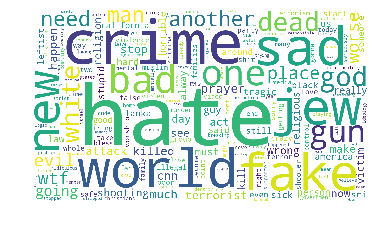

In [91]:
posneg_wordcloud(cnn_synagogue[1])

### FOX Wordclouds

In [83]:
fox_wall = get_sentiment_trump('D:\\ECE-143-Project---Group-11\\data\\news\\Fox\\Wall')

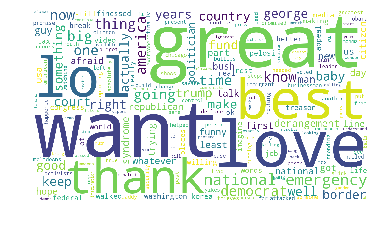

In [50]:
posneg_wordcloud(fox_wall[0]) #positive wordcloud

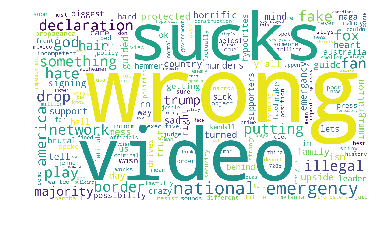

In [38]:
posneg_wordcloud(fox_wall[1]) #negative wordcloud

In [92]:
fox_synagogue = get_sentiment('D:\\ECE-143-Project---Group-11\\data\\news\\Fox\\Synagogue shooting')

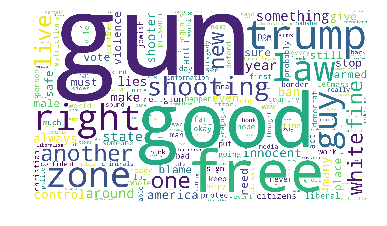

In [108]:
posneg_wordcloud(fox_synagogue[0]) #positive wordcloud, included 'california' in STOPWORDS

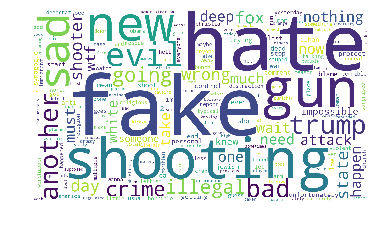

In [103]:
posneg_wordcloud(fox_synagogue[1]) #negative wordcloud, included 'california' in STOPWORDS

### BBC Wordclouds

In [109]:
bbc_wall = get_sentiment_trump('D:\\ECE-143-Project---Group-11\\data\\news\\BBC\\National Wall Emergency')

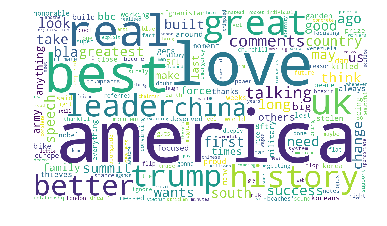

In [115]:
posneg_wordcloud(bbc_wall[0]) #positive wordcloud

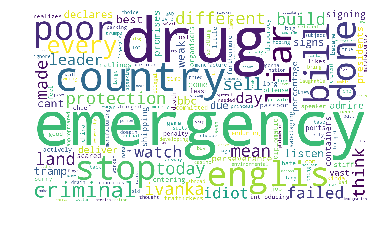

In [113]:
posneg_wordcloud(bbc_wall[1]) #negative wordcloud